## DSBDA Assignment 6


Name - Yashshree Kirad

Roll No - 41

Batch - T2

Branch - TE Comp

In [1]:
from sklearn import datasets
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import load_iris
iris1=load_iris()

In [3]:
iris=pd.DataFrame(data=iris1.data, columns=iris1.feature_names)
iris['target']=iris1.target

In [4]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [5]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [6]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


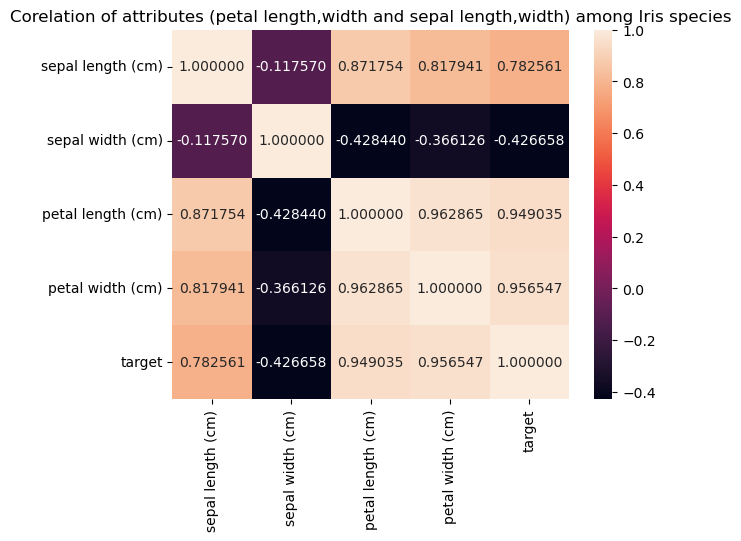

In [7]:

sns.heatmap(iris.corr(),annot=True,fmt="f").set_title("Corelation of attributes (petal length,width and sepal length,width) among Iris species")
plt.show()

In [8]:
# X (features) and y (labels).
X=iris.iloc[:,0:4].values
y=iris.iloc[:,4].values

In [9]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [11]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
print(Y_pred)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


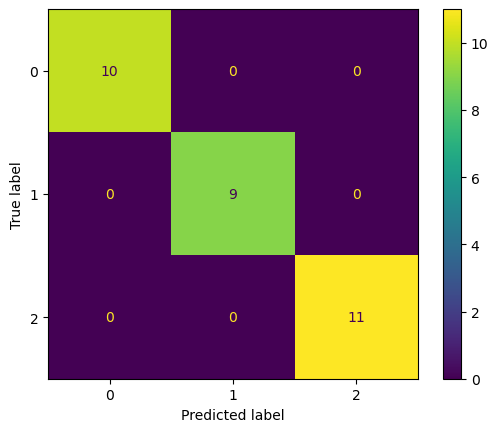

In [12]:
from sklearn import metrics


confusion_matrix = metrics.confusion_matrix(y_test, Y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()

In [13]:
from sklearn.metrics import classification_report
metric = classification_report(y_test, Y_pred)
print(metric)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



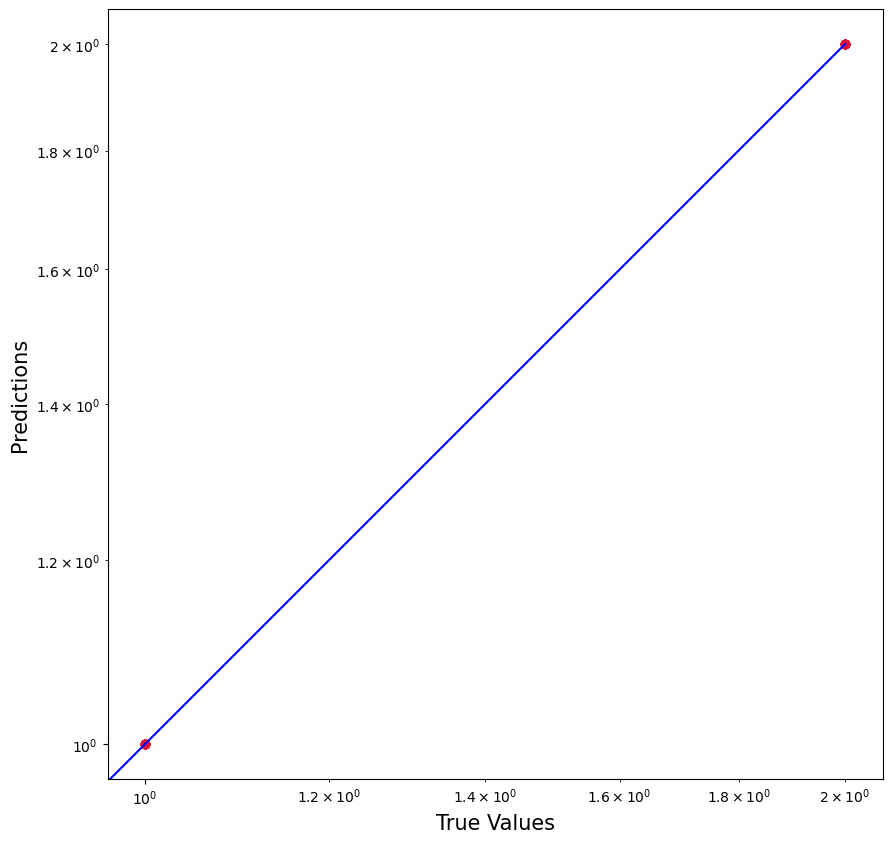

In [14]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, Y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(Y_pred), max(y_test))
p2 = min(min(Y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [15]:
from bokeh.sampledata.iris import flowers
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
 

# instantiating the figure object
graph = figure(title="Iris Visualization")
 
# labeling the x-axis and the y-axis
graph.xaxis.axis_label = "Length (in cm)"
graph.yaxis.axis_label = "Width (in cm)"
 
# plotting for setosa petals
x = flowers[flowers["species"] == "setosa"]["petal_length"]
y = flowers[flowers["species"] == "setosa"]["petal_width"]
marker = "circle_cross"
line_color = "blue"
fill_color = "lightblue"
fill_alpha = 0.4
size = 10
legend_label = "setosa petals"
graph.scatter(x, y,
              marker=marker,
              line_color=line_color,
              fill_color=fill_color,
              fill_alpha=fill_alpha,
              size=size,
              legend_label=legend_label)
 
# plotting for setosa sepals
x = flowers[flowers["species"] == "setosa"]["sepal_length"]
y = flowers[flowers["species"] == "setosa"]["sepal_width"]
marker = "square_cross"
line_color = "blue"
fill_color = "lightblue"
fill_alpha = 0.4
size = 10
legend_label = "setosa sepals"
graph.scatter(x, y,
              marker=marker,
              line_color=line_color,
              fill_color=fill_color,
              fill_alpha=fill_alpha,
              size=size,
              legend_label=legend_label)
 
# plotting for versicolor petals
x = flowers[flowers["species"] == "versicolor"]["petal_length"]
y = flowers[flowers["species"] == "versicolor"]["petal_width"]
marker = "circle_cross"
line_color = "yellow"
fill_color = "lightyellow"
fill_alpha = 0.4
size = 10
legend_label = "versicolor petals"
graph.scatter(x, y,
              marker=marker,
              line_color=line_color,
              fill_color=fill_color,
              fill_alpha=fill_alpha,
              size=size,
              legend_label=legend_label)
 
# plotting for versicolor sepals
x = flowers[flowers["species"] == "versicolor"]["sepal_length"]
y = flowers[flowers["species"] == "versicolor"]["sepal_width"]
marker = "square_cross"
line_color = "yellow"
fill_color = "lightyellow"
fill_alpha = 0.4
size = 10
legend_label = "versicolor sepals"
graph.scatter(x, y,
              marker=marker,
              line_color=line_color,
              fill_color=fill_color,
              fill_alpha=fill_alpha,
              size=size,
              legend_label=legend_label)
 
# plotting for virginica petals
x = flowers[flowers["species"] == "virginica"]["petal_length"]
y = flowers[flowers["species"] == "virginica"]["petal_width"]
marker = "circle_cross"
line_color = "red"
fill_color = "lightcoral"
fill_alpha = 0.4
size = 10
legend_label = "virginica petals"
graph.scatter(x, y,
              marker=marker,
              line_color=line_color,
              fill_color=fill_color,
              fill_alpha=fill_alpha,
              size=size,
              legend_label=legend_label)
 
# plotting for virginica sepals
x = flowers[flowers["species"] == "virginica"]["sepal_length"]
y = flowers[flowers["species"] == "virginica"]["sepal_width"]
marker = "square_cross"
line_color = "red"
fill_color = "lightcoral"
fill_alpha = 0.4
size = 10
legend_label = "virginica sepals"
graph.scatter(x, y,
              marker=marker,
              line_color=line_color,
              fill_color=fill_color,
              fill_alpha=fill_alpha,
              size=size,
              legend_label=legend_label)
 
# relocating the legend table to
# avoid abstruction of the graph
graph.legend.location = "top_left"
 
# displaying the model
output_notebook()
show(graph)

Loading BokehJS ...